<a href="https://colab.research.google.com/github/utkarsh270/IAR/blob/main/Adani_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords


nltk.download("stopwords")
stop= stopwords.words('english')
from string import punctuation

from collections import Counter
import re
import numpy as np

from tqdm import tqdm_notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Adani.csv to Adani.csv


In [ ]:
import io
tweet = pd.read_csv(io.BytesIO(uploaded['Adani.csv']))
tweet.head()

,timestamp,tweet,user,follower,source,location
0,6/2/2022 5:41,b'Even as Millions of Indians drop out of the ...,b'Sreekantanvpklm',0,b'Twitter for Android',b''
1,6/2/2022 5:41,"b'RT @Ramu_yenumula: In the last 5 years, the ...",b'SanjuktaChoudh5',1,b'Twitter Web App',b''
2,6/2/2022 5:40,"b'Ambani, Adani or Tata: Which business group ...",b'congmo1863',0,b'Twitter Web App',b''
3,6/2/2022 5:40,b'@sujitnair90 Ambani has been around for a wh...,b'john_is_da_man',0,b'Twitter for Android',"b'Kerala, Union of India'"
4,6/2/2022 5:40,b'@QLDLabor @AlboMP @AnthonyChisholm @MurrayWa...,b'HazySurvivor',0,b'Twitter for iPad',b' Boorlo (North-ish Perth) '


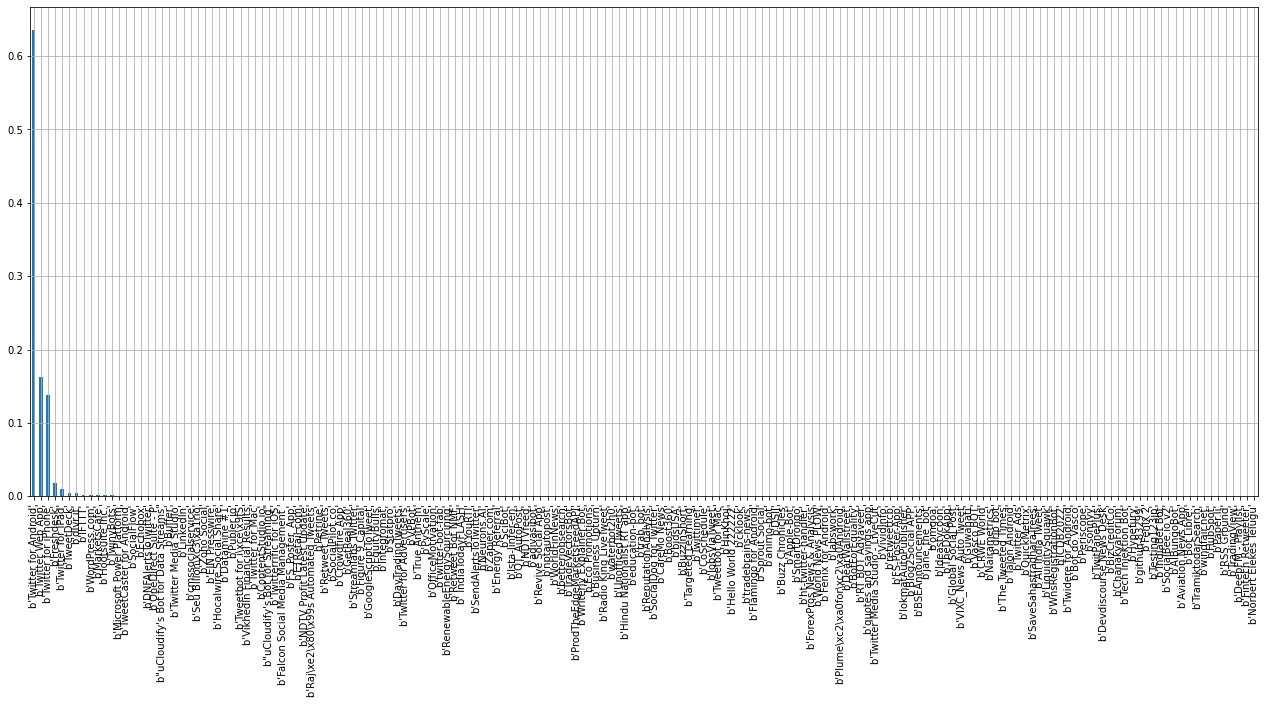

In [ ]:
tweet.source.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(22, 9))

In [ ]:
data = tweet.drop_duplicates('tweet')


In [ ]:
data.head()

,timestamp,tweet,user,follower,source,location
0,6/2/2022 5:41,b'Even as Millions of Indians drop out of the ...,b'Sreekantanvpklm',0,b'Twitter for Android',b''
1,6/2/2022 5:41,"b'RT @Ramu_yenumula: In the last 5 years, the ...",b'SanjuktaChoudh5',1,b'Twitter Web App',b''
2,6/2/2022 5:40,"b'Ambani, Adani or Tata: Which business group ...",b'congmo1863',0,b'Twitter Web App',b''
3,6/2/2022 5:40,b'@sujitnair90 Ambani has been around for a wh...,b'john_is_da_man',0,b'Twitter for Android',"b'Kerala, Union of India'"
4,6/2/2022 5:40,b'@QLDLabor @AlboMP @AnthonyChisholm @MurrayWa...,b'HazySurvivor',0,b'Twitter for iPad',b' Boorlo (North-ish Perth) '


In [ ]:
data = data.sample(10000, random_state=42)
data.reset_index(inplace=True, drop=True)

data.head(2)

,timestamp,tweet,user,follower,source,location
0,5/26/2022 2:41,b'@anil_es @narendramodi where money is invest...,b'dineshalbertson',0,b'Twitter for Android',b'Delhi'
1,5/26/2022 9:23,b'Billionaire Adani\xe2\x80\x99s Food Venture ...,b'vanalich',0,b'Twitter for Android',b''


In [ ]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text


In [ ]:
def tokenizer(text):
    text = clean_text(text)    
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    tokens = list(reduce(lambda x,y: x+y, tokens))
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    return tokens

In [ ]:
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
    except TypeError as e: print(text,e)

In [ ]:
import string
import nltk 
nltk.download('punkt')
data['tokens'] = data['tweet'].map(tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for description, tokens in zip(data['tweet'].head(),
                              data['tokens'].head()):
    print('Tweet:', description)
    print('tokens:', tokens)
    print()

Tweet: b'@anil_es @narendramodi where money is invested first.. Adani binami.. 40% cut money.. joot = loot..'
tokens: ['anil', 'narendramodi', 'money', 'invested', 'first', 'adani', 'binami', 'cut', 'money', 'joot', 'loot']

Tweet: b'Billionaire Adani\xe2\x80\x99s Food Venture Is Best-Performing Asia IPO  https://t.co/DVKbk7q18S'
tokens: ['billionaire', 'adani', 'food', 'venture', 'best', 'performing', 'asia', 'ipo', 'https', 'dvkbk']

Tweet: b'@gautam_adani \nPlease understand the problem of common man'
tokens: ['gautam', 'adani', 'nplease', 'understand', 'problem', 'common', 'man']

Tweet: b'As you work only for Ambani-Adani #GoBackModi'
tokens: ['work', 'ambani', 'adani', 'gobackmodi']

Tweet: b"Why Is Adani Green's Share Price Falling? Read more here: https://t.co/z4vSeYZm9m"
tokens: ['adani', 'green', 'share', 'price', 'falling', 'read', 'https', 'vseyzm']



In [ ]:
tweet.tail()

,timestamp,tweet,user,follower,source,location
26041,5/24/2022 17:45,b'@Adani_Elec_Mum When is Shubh muharat to get...,b'kinghenry003',0,b'Twitter for Android',"b'Mumbai, Maharashtra, India'"
26042,5/24/2022 17:44,"b""RT @ashoswai: Modi is begging $4billion from...",b'drramizsheikh',1060,b'Twitter Web App',b'INDIA.'
26043,5/24/2022 17:43,b'RT @arifahmedkhan26: @roninja74 @ManUtdMEN E...,b'roninja74',2,b'Twitter for iPhone',b'London'
26044,5/24/2022 17:42,"b'RT @nanayawsuspence: The whole Ghana, this b...",b'adani_e',2,b'Twitter for Android',"b'Ho, Ghana'"
26045,5/24/2022 17:42,b'RT @ParveenBhansali: Friends I hsve build up...,b'CharanT67555550',86,b'Twitter for Android',b''


In [ ]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
#import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

In [ ]:
tweet['Date'] = pd.to_datetime(tweet['timestamp'], infer_datetime_format=True)
tweet.head()

,timestamp,tweet,user,follower,source,location,Date
0,6/2/2022 5:41,b'Even as Millions of Indians drop out of the ...,b'Sreekantanvpklm',0,b'Twitter for Android',b'',2022-06-02 05:41:00
1,6/2/2022 5:41,"b'RT @Ramu_yenumula: In the last 5 years, the ...",b'SanjuktaChoudh5',1,b'Twitter Web App',b'',2022-06-02 05:41:00
2,6/2/2022 5:40,"b'Ambani, Adani or Tata: Which business group ...",b'congmo1863',0,b'Twitter Web App',b'',2022-06-02 05:40:00
3,6/2/2022 5:40,b'@sujitnair90 Ambani has been around for a wh...,b'john_is_da_man',0,b'Twitter for Android',"b'Kerala, Union of India'",2022-06-02 05:40:00
4,6/2/2022 5:40,b'@QLDLabor @AlboMP @AnthonyChisholm @MurrayWa...,b'HazySurvivor',0,b'Twitter for iPad',b' Boorlo (North-ish Perth) ',2022-06-02 05:40:00


In [ ]:

tweetsT = tweet['timestamp']


In [ ]:
# Preparing a corpus for analysis and checking first 10 entries

corpus=[]
a=[]
for i in range(len(tweet['tweet'])):
        a=tweet['tweet'][i]
        corpus.append(a)
        
corpus[0:10]

["b'Even as Millions of Indians drop out of the workforce - too discouraged to look for a job, Gautam Adani\\xe2\\x80\\x99s wealth ro\\xe2\\x80\\xa6 https://t.co/kbRuEOFOFq'",
 "b'RT @Ramu_yenumula: In the last 5 years, the income of the poorest 20% plunged by 53% while India\\nadded 40 Billionaires in 2020 (the pandemi\\xe2\\x80\\xa6'",
 "b'Ambani, Adani or Tata: Which business group has rewarded shareholders most in this lukewarm year - Gainers and,.. .\\xe2\\x80\\xa6 https://t.co/7auwXpqjJH'",
 "b'@sujitnair90 Ambani has been around for a while  but Adani has been growing in record speed. The fastest growth by\\xe2\\x80\\xa6 https://t.co/YvjqoftZUr'",
 "b'@QLDLabor @AlboMP @AnthonyChisholm @MurrayWatt @AnikaWells @JEChalmers I\\xe2\\x80\\x99m not convinced Labor will ever stop minin\\xe2\\x80\\xa6 https://t.co/avLr68ugXN'",
 "b'Ambani, Adani or Tata: Which business group has rewarded shareholders most in this lukewarm year - Gainers and,.. .\\xe2\\x80\\xa6 https://t.co/pYfXTPq9Pv'",

In [ ]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [ ]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [ ]:
total_topics = 5

In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in

In [ ]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.050*"adani" + 0.046*"b\'rt" + 0.020*"investment" + 0.019*"mou" + 0.018*"solar"'),
 (1,
  '0.042*"andhra" + 0.036*"b\'rt" + 0.031*"pradesh" + 0.029*"adani" + 0.019*"govt"'),
 (2,
  '0.019*"b\'rt" + 0.018*"proposal" + 0.016*"adani" + 0.014*"b"rt" + 0.014*"last"'),
 (3,
  '0.021*"b\'rt" + 0.020*"reliance" + 0.016*"pm" + 0.013*"@narendramodi" + 0.012*"promotes"'),
 (4,
  '0.042*"b\'rt" + 0.025*"&amp;" + 0.021*"b"rt" + 0.021*"adani" + 0.019*"drugs"')]

In [ ]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [ ]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 114)


In [ ]:
df_lda

,adani,b'rt,investment,mou,solar,signs,wef,end,new,one,...,arrested,"khan,",syndicate!\nhere,thousands\xe2\x80\xa6',"https://t.co/\xe2\x80\xa6""",owned,$16,@blackrock,end.,biggest
0,0.050463,0.046026,0.019618,0.018974,0.018453,0.018,0.017548,0.013697,0.00903,0.008782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.029017,0.035966,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.016104,0.018819,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.007513,0.020917,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.020606,0.041669,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,...,0.011768,0.011679,0.011623,0.011609,0.011301,0.009497,0.00948,0.009436,0.008324,0.008196


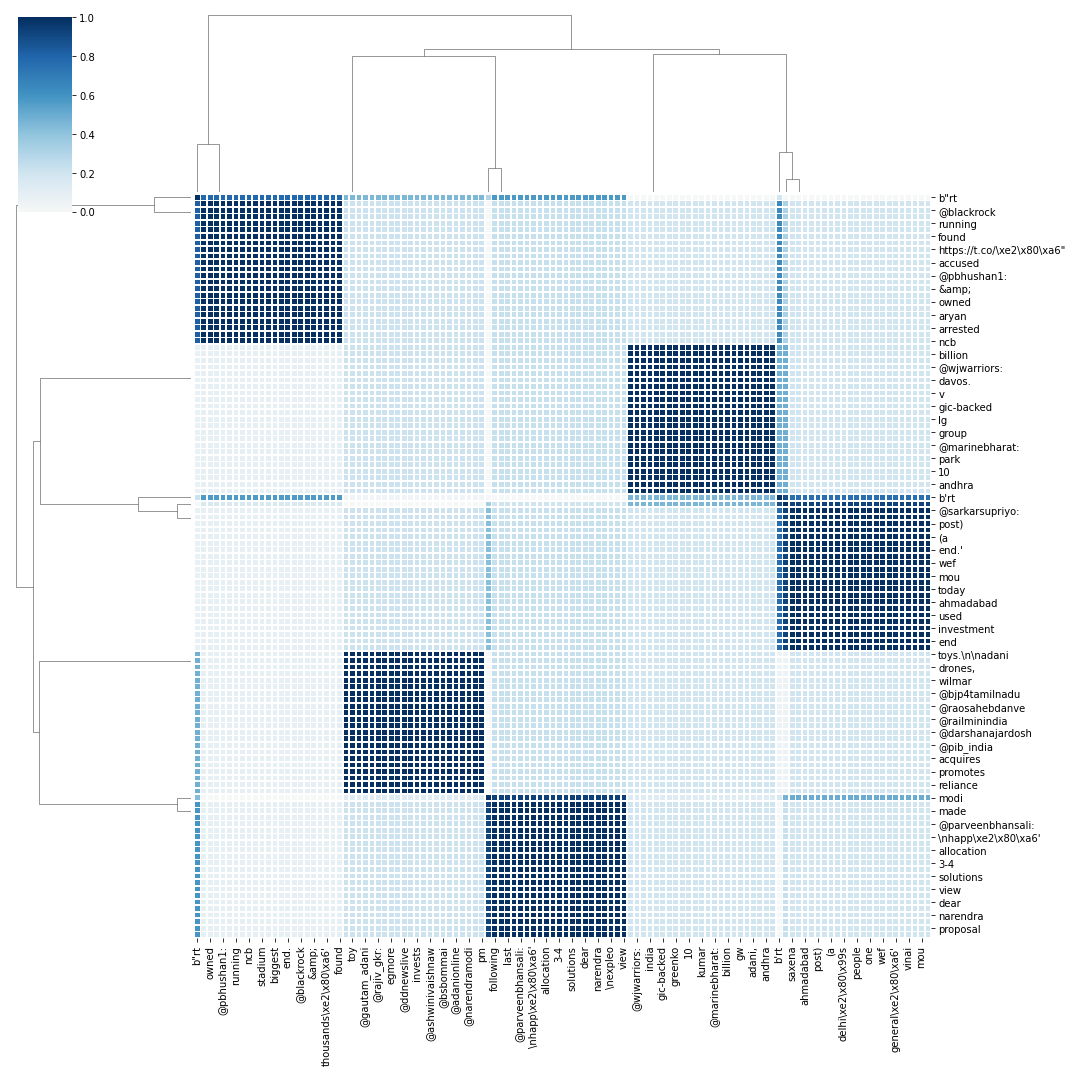

In [ ]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [ ]:

pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  39.867549
0       51.163364 -159.968018       2        1  21.061051
4      -73.144554   21.523815       3        1  18.865540
1      -66.410133 -110.606438       4        1  10.164129
3       54.417324   12.443444       5        1  10.041731, topic_info=               Term        Freq       Total Category  logprob  loglift
3370         andhra  110.000000  110.000000  Default  30.0000  30.0000
8445        pradesh   88.000000   88.000000  Default  29.0000  29.0000
20             b'rt  802.000000  802.000000  Default  28.0000  28.0000
30            adani  641.000000  641.000000  Default  27.0000  27.0000
3863     investment  107.000000  107.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
561    @adanionline   25.396690   73.075197   Topic5  -4.6346   1.2416
20             b'rt   54.707053  802.568615   Topic5  -3.8672  -0.3874
117            b"rt   29.621530  308.542625   Topic5  -4.4807  -0.0449
500   @gautam_adani   15.295831   81.905399   Topic5  -5.1416   0.6204
30            adani   19.649120  641.760090   Topic5  -4.8912  -1.1878

[288 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
21601      1  0.988659       $100
21601      4  0.017345       $100
8440       3  0.882960        $16
8440       4  0.131505        $16
21602      1  0.994499  $4billion
...      ...       ...        ...
8611       3  0.994061  wilson\n-
21605      1  0.994499    years."
442        1  0.985570       yes.
3788       3  0.992828        yet
2446       2  1.008060      youth

[362 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 4])